# Лабораторна робота №4. Аналіз головних компонент
## Виконав студент групи КМ-91мп
## Галета М.С.
## Завдання на лабораторну роботу
<img src="task.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Зчитування датасету 

In [2]:
df = pd.read_csv('MP-04-Galeta.csv', delimiter=';', names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])

X_train = df.iloc[:200, :-1].values
X_test = df.iloc[200:250, :-1].values
y_train = df['y'].iloc[:200].values.reshape((200, 1))
y_test = df['y'].iloc[200:250].values.reshape((50, 1))

## Центрування і стандартизація даних
$$X_{new} = \frac{X - \mu}{\sigma}$$

In [3]:
class Scaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0, keepdims=True)
        self.std = np.std(X, axis=0, keepdims=True)
        
    def transform(self, X):
        X_new = (X - self.mean)/self.std
        return X_new
    
    def fit_transform(self, X):
        self.mean = np.mean(X, axis=0, keepdims=True)
        self.std = np.std(X, axis=0, keepdims=True)
        X_new = (X - self.mean)/self.std
        return X_new

In [4]:
sc = Scaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Аналіз головних компонент

In [5]:
pca = PCA(n_components=6)
pca.fit(X_train)
most_important = [np.abs(pca.components_[j]).argmax() for j in range(6)]
initial_feature_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
most_important_names = [initial_feature_names[most_important[j]] for j in range(6)]
d = {'PC_{}'.format(j+1): most_important_names[j] for j in range(6)}
df = pd.DataFrame(columns=["Компонента", "Ознака"], data=d.items())
df["Внесок"] = np.round(pca.explained_variance_ratio_, 4)*100
df

,Компонента,Ознака,Внесок
0,PC_1,x3,77.86
1,PC_2,x4,10.53
2,PC_3,x5,6.07
3,PC_4,x1,3.39
4,PC_5,x6,1.81
5,PC_6,x3,0.34


$
a)\;Два\;параметри\;з\;найбільшим\;внеском\;в\;дисперсію:\;х3,\;х4 \\
b)\;Для\;досягнення\;сумарного\;внеску\;в\;дисперсію: \\
\;\;\;1)\;60\%\;необхідно\;взяти\;1\;параметр \\
\;\;\;\;2)\;80\%\;необхідно\;взяти\;2\;параметри \\
\;\;\;\;3)\;98\%\;необхідно\;взяти\;5\;параметрів \\
c)\;Потрібно\;взяти\;мінімум\;3\;параметри,\;щоб\;їх\;сумарний\;вклад\;в\;дисперсію\;був\;не\;менше\;90\% \\
$

$ Оберемо\;перших\;4\;компоненти,\;тобто\;ознаки:\;x1,\;x3,\;x4,\;x5 $

## Графіки залежності ознак від Y

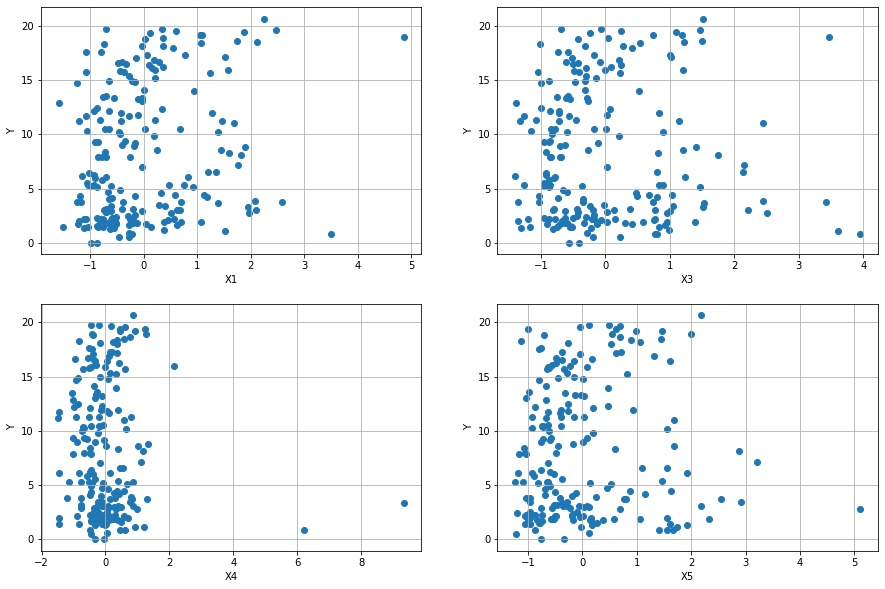

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

xlabel = [['1', '3'], ['4', '5']]
arr = [[0, 2], [3, 4]]
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel('X'+xlabel[i][j])
        ax[i][j].set_ylabel('Y')
        ax[i][j].grid(True)
        ax[i][j].scatter(X_train[:, arr[i][j]], y_train)
        
plt.show()

## Модель лінійної регресії на цих ознаках

In [7]:
lr = LinearRegression(normalize=True)
lr.fit(X_train[:, [0,2,3,4]], y_train)
y_pred_tr = lr.predict(X_train[:, [0,2,3,4]])
y_pred_te = lr.predict(X_test[:, [0,2,3,4]])

In [8]:
print("Коефіцієнти регресії: {}".format(lr.coef_))
print("Коефіцієнт множинної детермінації R2: {}".format(lr.score(X_train[:, [0,2,3,4]], y_train)))
print("Середньоквадратична похибка (MSE): {}".format(np.mean((y_pred_te - y_test)**2)))

Коефіцієнти регресії: [[ 8.49796478 -7.36713954 -1.12052723  0.47239252]]
Коефіцієнт множинної детермінації R2: 0.3298766800205949
Середньоквадратична похибка (MSE): 67.96823533815589


## Порівняння із першою лабораторною
<img src="determ_coef.png">
<img src="errors.png">

## Візуалізація

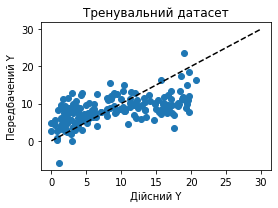

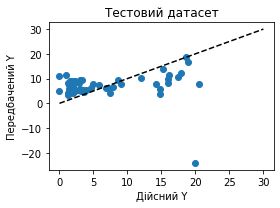

In [9]:
plt.figure(figsize=(4, 3))
plt.title("Тренувальний датасет")
plt.scatter(y_train, y_pred_tr)
plt.plot([0, 30], [0, 30], "--k")
plt.axis("tight")
plt.xlabel("Дійсний Y")
plt.ylabel("Передбачений Y")
plt.tight_layout()

plt.figure(figsize=(4, 3))
plt.title("Тeстовий датасет")
plt.scatter(y_test, y_pred_te)
plt.plot([0, 30], [0, 30], "--k")
plt.axis("tight")
plt.xlabel("Дійсний Y")
plt.ylabel("Передбачений Y")
plt.tight_layout()

## Висновки:
#### 1) Використовуючи метод PCA, було проаналізовано головні компоненти датасету. Було обрано 4 ознаки, що відповідають 4 компонентам із сумарним внеском в дисперсію 97.85%
#### 2) На основі цих ознак було збудовано лінійну регресію
#### 3) Коефіцієнт множинної детермінації трохи гірший в порівнянні із 1 лабораторною, проте середньо-квадратична похибка менша, але не суттєво